In [ ]:
# This code is intended to fulfill the requirements for York University CSML1010 Independent Project Milestone 1.
# This notebook has been edited by Kathryn Renton and designed for learning purposes only.

# **The Impact of Stress Factors on Students**

# **Problem Definition**

The following notebook is a code walkthrough of an analysis of stress factors in students. The uploader of the dataset provided a list of questions to answer. The following notebook will seek to answer these questions as well as provide some additional insights from the dataset. The data is located [here](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data) and is sampled from a nationwide survey conducted during June 2022 to October 2022.

There are no demographics provided. Sometimes demographics are omitted from public raw data to help ensure confidentiality and protect peoples' identities, especially with sensitive data.

# **Preparing the Environment**

In [ ]:
#imported packages
import numpy as np #for arrays and linear algebra
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for basic visualizations
import seaborn as sns #for advanced visualizations

In [ ]:
#added the .csv datset to the directory manually and then read the data
df = pd.read_csv("StressLevelDataset.csv")

#**Understanding the Dataset**

In [ ]:
#let's take a look the dataset

#here are the header columns
print(df.columns.tolist())

['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


In [ ]:
#here is the dataframe
print(df)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

In [ ]:
#here is some basic information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Some Descriptive Statistics

In [ ]:
#we will run some descriptive statistics to better understand our data

#what is the sample size?
#from the dataframe (df) we pull length (len) and define variable as 'student_n' where n = sample size
n_student=len(df)
#then we print to view
print("Overall sample size =", n_student)

Overall sample size = 1100


In [ ]:
#what is the average anxiety level of students?

#we define our anxiety level variable, and then from the dataframe we pull column 'anxiety_level' and then calculate the mean
avg_anxiety_lvl=df['anxiety_level'].mean()
#then we view
print("Average anxiety level of students =", avg_anxiety_lvl)

Average anxiety level of students = 11.063636363636364


In [ ]:
#what is the number of students with a history of mental health issues?

#we define the subset of students with a history of mental health issues
#then from the dataframe (df) we pull column 'mental_health_history' and set the condition as equal to 1
student_w_mental_health_history=df[df['mental_health_history']==1]
#then from the dataframe we pull length and define variable as 'student_n' where n = sample of students with mental health history
n_student_w_mental_health_history=len(student_w_mental_health_history)
#then we view
print("Number of students with mental health history =", n_student_w_mental_health_history)


Number of students with mental health history = 542


The dataset has 20 features which can be grouped by category for further analysis. Let's define the categories.

Assigning Features under 5 Categories (Factors)

In [ ]:
#let's group the five factor categories based on similar column headers
psy=['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
soc=['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
phy=['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
env=['noise_level', 'living_conditions', 'safety', 'basic_needs']
aca=['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']

In [ ]:
#then calculate the number of students with negative experiences or conditions by the factors
#we do this by selecting the factor column and apply a function (check if each element is <3 (lt) or >3 (gt), then count how many scores)
n_students_with_negative_psy = df[psy].apply(lambda x: x.lt(3).sum(), axis=1)
n_students_with_negative_phy = df[phy].apply(lambda x: x.gt(3).sum(), axis=1)
n_students_with_negative_env = df[env].apply(lambda x: x.gt(3).sum(), axis=1)
n_students_with_negative_aca = df[aca].apply(lambda x: x.lt(3).sum(), axis=1)
n_students_with_negative_soc = df[soc].apply(lambda x: x.gt(3).sum(), axis=1)

In [ ]:
#next create a bar chart for the number of students with negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    n_students_with_negative_psy.sum(),
    n_students_with_negative_phy.sum(),
    n_students_with_negative_env.sum(),
    n_students_with_negative_aca.sum(),
    n_students_with_negative_soc.sum()
    ]

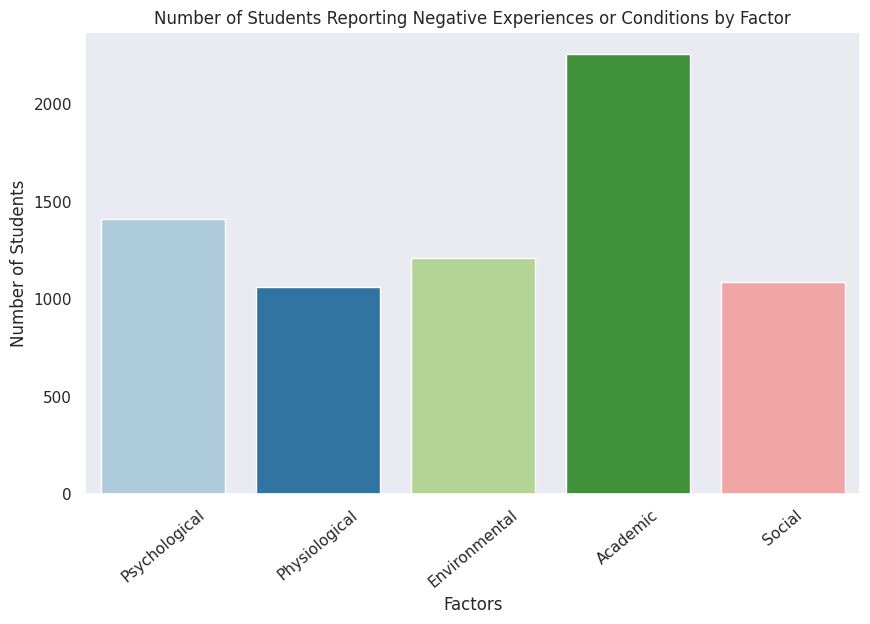

In [ ]:
#here we use matplotlib (plt) to visualize the bar chart

#use seaborn (sns) to set a style for the plots
sns.set(style="dark", palette="Paired")

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=40)
plt.show()

# **Results i.e. The Solution**

Psychological Factors

In [ ]:
#number of students with below average self-esteem?
avg_self_esteem = df['self_esteem'].mean()
student_below_avg_self_esteem = df[df['self_esteem'] < avg_self_esteem]
n_student_below_avg_self_esteem = len(student_below_avg_self_esteem)
print("Number of students with self-esteem below the average:", n_student_below_avg_self_esteem)

#percentage of students with depression?
percentage_student_experiencing_depression = (df['depression'].sum() / n_student) * 100
print(f"Percentage of students experiencing depression: {percentage_student_experiencing_depression:.2f}%")


Number of students with self-esteem below the average: 507
Percentage of students experiencing depression: 1255.55%


In [ ]:
#the percentage above is not very clear and is way above what we would expect
#there is a different way to express it by setting a limit (threshold) and creating a binary column
#here we set the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

#ensure 'num_students' is defined. If not, define it.
if 'n_student' not in locals():
    n_student = len(df)

percentage_student_experiencing_depression = (df['depression_binary'].sum() / n_student) * 100

print(f"Percentage of students experiencing depression: {percentage_student_experiencing_depression:.2f}%")

Percentage of students experiencing depression: 56.36%


Physiological Factors

In [ ]:
#how many students experience headaches frequently?
student_w_frequent_headaches = df[df['headache'] == 1]
n_student_w_frequent_headaches = len(student_w_frequent_headaches)
print("Number of students experiencing frequent headaches:", n_student_w_frequent_headaches)

#what is the average blood pressure reading among the students?
avg_blood_pressure = df['blood_pressure'].mean()
print("Average blood pressure reading among the students:", avg_blood_pressure)

#how many students rate their sleep quality as poor?
student_w_poor_sleep_quality = df[df['sleep_quality'] < 3]
n_student_w_poor_sleep_quality = len(student_w_poor_sleep_quality)
print("Number of students with poor sleep quality:", n_student_w_poor_sleep_quality)

Number of students experiencing frequent headaches: 331
Average blood pressure reading among the students: 2.1818181818181817
Number of students with poor sleep quality: 550


Sociological Factors

In [ ]:
#how many students feel they have strong social support?
student_w_strong_social_support = df[df['social_support'] > 3]
n_student_w_strong_social_support = len(student_w_strong_social_support)
print("Number of students with strong social support:", n_student_w_strong_social_support)

#what percentage of students have experienced bullying?
percentage_student_experiencing_bullying = (df['bullying'].sum() / n_student) * 100
print("Percentage of students experiencing bullying:", percentage_student_experiencing_bullying)

#what is the number of students who participate in extracurriculars?
student_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
n_student_participating_in_extracurricular = len(student_participating_in_extracurricular)
print("Number of students participating in extracurricular activities:", n_student_participating_in_extracurricular)

Number of students with strong social support: 0
Percentage of students experiencing bullying: 261.72727272727275
Number of students participating in extracurricular activities: 184


In [ ]:
#similar to the depression apercentage issue, the safety percentage above is not very clear and is way above what we would expect
#there is a different way to express it by setting a limit (threshold) and creating a binary column
#here we set the threshold for bullying and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

#then we define the variable and calculate the percentage ((bullying divided by n)x100)
percentage_student_experiencing_bullying = (df['bullying_binary'].sum() / n_student) * 100

print(f"Percentage of students experiencing bullying: {percentage_student_experiencing_bullying:.2f}%")

Percentage of students experiencing bullying: 32.73%


Academic Factors

In [ ]:
#how many students rate their academic performance as below average?
student_below_avg_academic_performance = df[df['academic_performance'] < 3]
n_student_below_avg_academic_performance = len(student_below_avg_academic_performance)
print("Number of students with below-average academic performance:", n_student_below_avg_academic_performance)

#what is the average study load reported by students?
avg_study_load = df['study_load'].mean()
print("Average study load reported by students:", avg_study_load)

#how many students have concerns about their future careers?
student_w_future_career_concerns = df[df['future_career_concerns'] == 1]
n_student_w_future_career_concerns = len(student_w_future_career_concerns)
print("Number of students with concerns about their future careers:", n_student_w_future_career_concerns)

Number of students with below-average academic performance: 561
Average study load reported by students: 2.6218181818181816
Number of students with concerns about their future careers: 327


Environmental Factors

In [ ]:
#how many students live in conditions with high noise levels?
student_in_high_noise_conditions = df[df['noise_level'] > 3]
n_student_in_high_noise_conditions = len(student_in_high_noise_conditions)
print("Number of students living in high noise conditions:", n_student_in_high_noise_conditions)

#what percentage of students feel unsafe in their living conditions?
percentage_student_feeling_unsafe = (df['safety'].sum() / n_student) * 100
print("Percentage of students feeling unsafe in their living conditions:", percentage_student_feeling_unsafe)

#how many students have reported not having their basic needs met?
student_without_basic_needs = df[df['basic_needs'] == 0]
n_student_without_basic_needs = len(student_without_basic_needs)
print("Number of students without their basic needs met:", n_student_without_basic_needs)

Number of students living in high noise conditions: 274
Percentage of students feeling unsafe in their living conditions: 273.72727272727275
Number of students without their basic needs met: 40


In [ ]:
#similar to the depression and academic percentage issues, the safety percentage above is not very clear and is way above what we would expect
#there is a different way to express it by setting a limit (threshold) and creating a binary column
#here we set the threshold for safety
#then we create a binary column where 1 represents 'feeling unsafe', 0 represents 'feeling safe'
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)

#then we define the variable and calculate the percentage ((unsafe divided by n)x100)
percentage_student_feeling_unsafe = (df['feeling_unsafe'].sum() / n_student) * 100
print(f"Percentage of students feeling unsafe in their living conditions: {percentage_student_feeling_unsafe:.2f}%")

Percentage of students feeling unsafe in their living conditions: 51.36%


Comparative Analysis

In [ ]:
#is there a correlation between anxiety level and academic performance?
corr_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])
print("Correlation between anxiety level and academic performance:", corr_anxiety_academic)

#do students with poor sleep quality also report higher levels of depression?
corr_sleep_depression = df['sleep_quality'].corr(df['depression'])
print("Correlation between sleep quality and depression:", corr_sleep_depression)

#are students who experience bullying more likely to have a history of mental health issues?
student_w_bullying_history = df[df['bullying'] == 1]
student_w_bullying_history_and_mental_health_history = student_w_bullying_history[
    student_w_bullying_history['mental_health_history'] == 1]
percentage_student_w_bullying_and_mental_health_history = (
    len(student_w_bullying_history_and_mental_health_history) / len(student_w_bullying_history)) * 100
print("Percentage of students with bullying history and mental health history:", percentage_student_w_bullying_and_mental_health_history)

Correlation between anxiety level and academic performance: -0.6496011296145091
Correlation between sleep quality and depression: -0.6931609071393333
Percentage of students with bullying history and mental health history: 4.179104477611941


Other Exploration

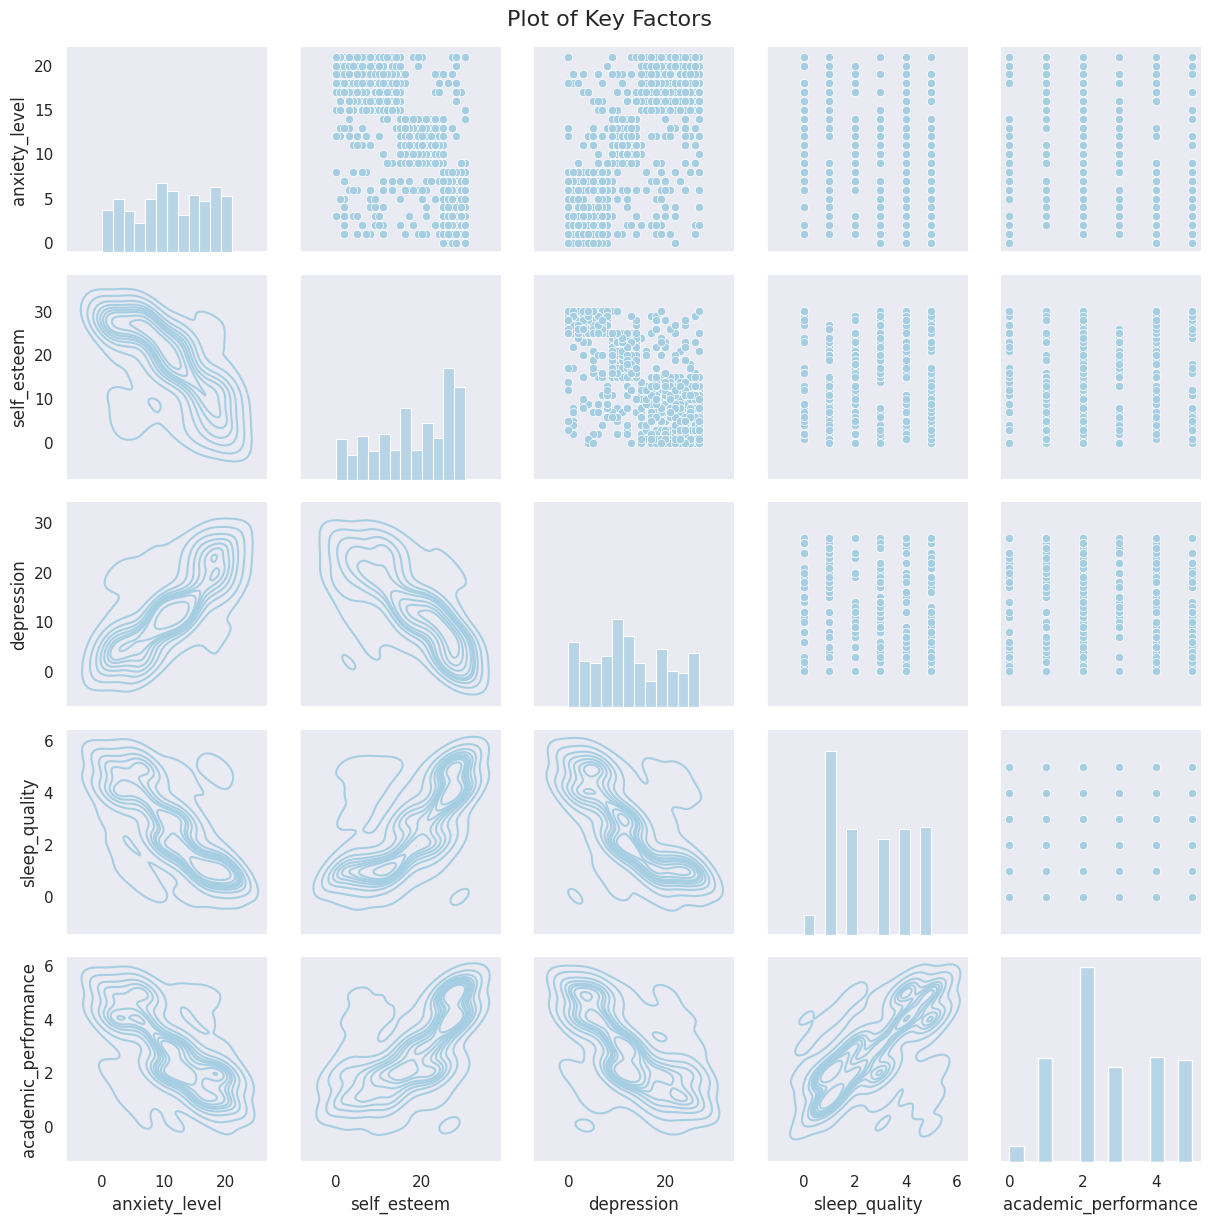

In [ ]:
#are there any noticeable trends or patterns when comparing different features?
#let's build some visualizations to see if there are any trends or patterns between features

#plot the features to seaborn
factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

#determine the type of plots to visualize
g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Plot of Key Factors", size=16)

#display the plots
plt.show()

The above grid of plots helps us to understand the relationships between anxiety, self-esteem, sleep quality and performance.

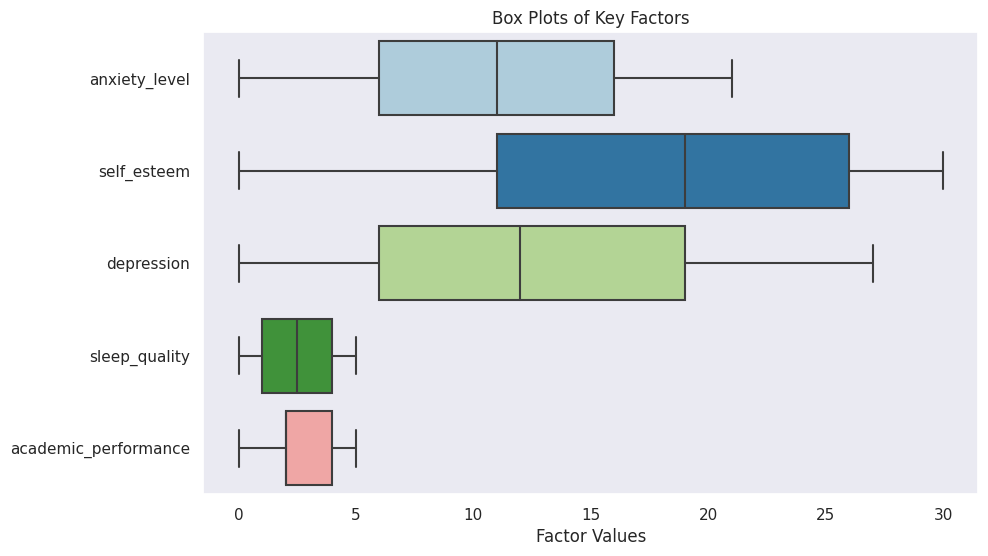

In [ ]:
#let's do a box plot to look at the distributions of these select features

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()

The box plot shows the distribution of data in quartiles min, first quartile, median, third quartile, and max. Self esteem box is wide suggesting more variability in the data.

Feature Importance and Random Forest Model

In [ ]:
#which specific feature within each factor has the most significant impact on student stress, based on the dataset?

#let's utilize feature importance analysis to determine which specific feature within each factor has the most impact

#import sklearn to build and fit random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

#note that factors were defined earlier in the code along with features for each corresponding factor

#build the Random Forest Regression model using the factors and feature from earlier
model = RandomForestRegressor()
feature_importance = {}

#loop through each factor and analyze feature importance
for factor, features in zip(factors, [psy, phy, env, aca, soc]):
    X = df[features]
    y = df['stress_level']

#fit the model
    model.fit(X, y)

#get the feature importances
    importance = model.feature_importances_

#store the feature importances in the dictionary
    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}

#lastly, print the feature importance for each factor
for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

Factor: Psychological
- Feature: anxiety_level, Importance: 0.22193848122908566
- Feature: self_esteem, Importance: 0.5630949371792129
- Feature: mental_health_history, Importance: 0.02227981285500724
- Feature: depression, Importance: 0.19268676873669427

Factor: Physiological
- Feature: headache, Importance: 0.4264117016942036
- Feature: blood_pressure, Importance: 0.05051004555448866
- Feature: sleep_quality, Importance: 0.4536651263102682
- Feature: breathing_problem, Importance: 0.06941312644103959

Factor: Environmental
- Feature: noise_level, Importance: 0.14574355072124823
- Feature: living_conditions, Importance: 0.12168881952903896
- Feature: safety, Importance: 0.3042491364828051
- Feature: basic_needs, Importance: 0.42831849326690774

Factor: Academic
- Feature: academic_performance, Importance: 0.4174970691505515
- Feature: study_load, Importance: 0.10381797609538343
- Feature: teacher_student_relationship, Importance: 0.25234386989354385
- Feature: future_career_concerns,

In terms of student stress factors:
For psychological, self-esteem has the most impact on stress.
For physiological, sleep quality has the most impact on stress.
For environmental, basic needs has the most impact on stress.
For academic, academic performance has the most impact on stress.
For social, bullying has the most impact on stress.



# **Conclusion**

Some challenges faced were typos and a missing data dictionary. The dataset appeared clean though preprocessing helped to allign new variables for analyses. Assumptions were made regarding the interpretation of the dataset based on the questions provided (e.g., mental health history variable was assumed 0 = no experience, 1 = experience, or anxiety level was assumed to be a score on a measure with a range from 0 to 21).

There were some issues with large percentages that went above 100%. These were fixed by setting thresholds and creating new binary columns for each percentage over 100%.



I would like to see a joining dataset that contains demographic variables such as age, major, gender, disability, etc. to see if there are any significant differences between groups in order to see if student stress could be mitigated by targeting well-being efforts towards specific groups.